# Using our Enviroment

Before using our custom enviroment we must use pip to install it.

In [ ]:
!pip install --user --upgrade --editable Assignment-1

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

In [ ]:
#It's better to restart the kernel once the pip is done installing.

#We now simply import gym, create our environment and run a few steps.

#Setting global seed for both random and numpy.random

In [92]:
import gymnasium as gym
import numpy as np
import pandas as pd
import math
import random
from matplotlib import pyplot as plt
random.seed(2023)
np.random.seed(2023)
init_prob=[0.5,0.5]
env=gym.make('Assignment_1:twoArmedBernoulliBandit-v0',prob=init_prob)
episodes = 10
for episode in range(1,episodes+1):
    state=env.reset(seed=2023)
    done= False
    action =random.choice(list(range(0,env.action_space.n)))
    end_state, reward, done, truncated,info =env.step(action)
    
    print('Episode:{} End State: {} Reward:{} Action:{}'.format(episode,end_state,reward,action))

Episode:1 End State: 0 Reward:0 Action:1
Episode:2 End State: 2 Reward:1 Action:1
Episode:3 End State: 2 Reward:1 Action:1
Episode:4 End State: 0 Reward:0 Action:1
Episode:5 End State: 0 Reward:0 Action:1
Episode:6 End State: 0 Reward:1 Action:0
Episode:7 End State: 0 Reward:1 Action:0
Episode:8 End State: 2 Reward:1 Action:1
Episode:9 End State: 2 Reward:1 Action:1
Episode:10 End State: 2 Reward:0 Action:0


Initializing all the required parameters in a  dictionary 

In [93]:
params={}
params["maxEpisodes"]=1000
params["epsilon"]=0.1
params["initial_epsilon"]=1.0
params["final_epsilon"]={}
params["decay_rate"]={}
params["final_epsilon"]['lin']=0.0
params["final_epsilon"]['exp']=0.0001
params["decay_rate"]['lin']=(params["initial_epsilon"]-params["final_epsilon"]['lin'])/params["maxEpisodes"]
params["decay_rate"]['exp']=np.log(params["initial_epsilon"]/params["final_epsilon"]['exp'])/params["maxEpisodes"]
params["c_UCB"]=0.1
params["init_temp"]=10000000
params["final_temp"]=0.05
params["temp_decay_rate_lin"]=(params["init_temp"]-params["final_temp"])/params["maxEpisodes"]
params["temp_decay_rate_exp"]=np.log(params["init_temp"]/params["final_temp"])/params["maxEpisodes"]
params["no_envs"]=50


Declaring Initial helper function Softmax

In [94]:
def softMax(x):
    return np.exp(x)/(np.sum(np.exp(x)))

Pure Exploitation

In [95]:
import pandas

def PureExploitation(env,params):
    # print("PureExploitation")
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est = np.zeros((params["maxEpisodes"],env.action_space.n))
    R=np.zeros((params["maxEpisodes"]))
    actions=np.zeros((params["maxEpisodes"]))
    env.reset(seed=2023)
    while e < params["maxEpisodes"]-1 :
        max_indices=np.where(Q==np.amax(Q))
        action = random.choice(max_indices[0])
        end_state, reward, done,truncated,info = env.step(action)
        N[action] = N[action] + 1
        Q[action] = Q[action] + (reward-Q[action])/N[action]
        e = e+1
        Q_est[e] = Q
        R[e]=reward
        actions[e]=action
        env.reset(seed=2023)
    return Q_est,R,actions
random.seed(2023)
np.random.seed(2023)

Q_e, R_e, actions_e = PureExploitation(env, params)

R_e = R_e.astype(int)
actions_e = actions_e.astype(int)
# Now you can create a DataFrame from the data.
data = {
    "Episode no.": range(1, params["maxEpisodes"] + 1),
    "Q estimate for Action 0": Q_e[:, 0],
    "Q estimate for Action 1": Q_e[:, 1],
    "Rewards": R_e,
    "Action Taken": actions_e
}

df = pd.DataFrame(data)
df_first_10_rows = df.head(10)
# Convert the DataFrame to a LaTeX table.
format_dict = {
    'Q estimate for Action 0': '{:.3f}',
    'Q estimate for Action 1': '{:.3f}',
    'Rewards': '{:d}',
    'Action Taken': '{:d}'
}

latex_table = df_first_10_rows.to_latex(index=False, formatters=format_dict)

# Print the LaTeX table string.
print(latex_table)

print(PureExploitation(env,params))


\begin{tabular}{rrrrr}
\toprule
Episode no. & Q estimate for Action 0 & Q estimate for Action 1 & Rewards & Action Taken \\
\midrule
1 & 0.000 & 0.000 & 0 & 0 \\
2 & 0.000 & 0.000 & 0 & 1 \\
3 & 0.000 & 0.500 & 1 & 1 \\
4 & 0.000 & 0.667 & 1 & 1 \\
5 & 0.000 & 0.500 & 0 & 1 \\
6 & 0.000 & 0.400 & 0 & 1 \\
7 & 0.000 & 0.333 & 0 & 1 \\
8 & 0.000 & 0.286 & 0 & 1 \\
9 & 0.000 & 0.375 & 1 & 1 \\
10 & 0.000 & 0.444 & 1 & 1 \\
\bottomrule
\end{tabular}

(array([[0.       , 0.       ],
       [0.       , 0.       ],
       [0.       , 0.       ],
       ...,
       [0.5005015, 0.       ],
       [0.501002 , 0.       ],
       [0.5005005, 0.       ]]), array([0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1

Pure Exploration

In [97]:
def PureExploration(env,params):
    # print("PureExploration")
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est = np.zeros((params["maxEpisodes"],env.action_space.n))
    R=np.zeros((params["maxEpisodes"]))
    actions=np.zeros((params["maxEpisodes"]))
    env.reset(seed=2023)
    while e < params["maxEpisodes"]-1 :
        action= random.choice((0,len(Q)-1))
        # print(action)
        end_state, reward, done,truncated, info = env.step(action)
        N[action] = N[action] + 1
        Q[action] = Q[action] + (reward-Q[action])/N[action]
        e = e+1
        Q_est[e] = Q
        R[e]=reward
        actions[e]=action
        env.reset(seed=2023)
    return Q_est,R,actions


Epsilon Greedy 

In [98]:
def epsilonGreedy(env,params):
    # print("epsilonGreedy")
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est = np.zeros((params["maxEpisodes"],env.action_space.n))
    R=np.zeros((params["maxEpisodes"]))
    actions=np.zeros((params["maxEpisodes"]))
    env.reset(seed=2023)
    while e < params["maxEpisodes"]-1 :
        if random.random() > params["epsilon"]:
            max_indices=np.where(Q==np.amax(Q))
            action = random.choice(max_indices[0])
        else :
            action= random.choice((0,len(Q)-1))
        # print(action)
        end_state, reward, done,truncated, info = env.step(action)
        N[action] = N[action] + 1
        Q[action] = Q[action] + (reward-Q[action])/N[action]
        e = e+1
        Q_est[e] = Q
        R[e]=reward
        actions[e]=action
        env.reset(seed=2023)
    return Q_est,R,actions


decaying Epsilon Greedy

In [99]:
def decayingEpsilonGreedy(env,params,type):
    # print("decayingEpsilonGreedy")
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est = np.zeros((params["maxEpisodes"],env.action_space.n))
    R=np.zeros((params["maxEpisodes"]))
    actions=np.zeros((params["maxEpisodes"]))
    env.reset(seed=2023)
    epsilon=params["initial_epsilon"]
    while e < params["maxEpisodes"]-1 :
        if random.random() > epsilon:
            max_indices=np.where(Q==np.amax(Q))
            action = random.choice(max_indices[0])
        else :
            action= random.choice((0,len(Q)-1))
        # print(action)
        end_state, reward, done,truncated,info = env.step(action)
        N[action] = N[action] + 1
        Q[action] = Q[action] + (reward-Q[action])/N[action]
        e = e+1
        Q_est[e] = Q
        
        if type=='lin':
            epsilon=epsilon-params["decay_rate"]['lin']
        else :
            epsilon = epsilon*np.exp(-params["decay_rate"]['exp'])
            
        R[e]=reward
        actions[e]=action
        env.reset(seed=2023)
    return Q_est,R,actions



In [103]:
#Softmax Exploration

In [104]:
def softMaxExploration(env,params,type):
    # print("softMaxExploration")
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est = np.zeros((params["maxEpisodes"],env.action_space.n))
    R=np.zeros((params["maxEpisodes"]))
    actions=np.zeros((params["maxEpisodes"]))
    env.reset(seed=2023)
    temp=params["init_temp"]
    while e < params["maxEpisodes"]-1 :
        probs = softMax(Q/temp)
        action=random.choices(list(range(0,env.action_space.n)),weights=probs,k=1)[0]
        # print(action)
        end_state, reward, done, truncated,info = env.step(action)
        N[action] = N[action] + 1
        Q[action] = Q[action] + (reward-Q[action])/N[action]
        # have to decay temperature
        e = e+1
        Q_est[e] = Q
        if type=='lin':
            temp=temp-params["temp_decay_rate_lin"]
        else :
            temp = temp*np.exp(-params["temp_decay_rate_exp"])
        R[e]=reward
        actions[e]=action
        env.reset(seed=2023)
    return Q_est,R,actions


Upper Confidence Bound Exploration

In [105]:
def UCBexploration(env,params):
    # print("UCBexploration")
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)

    e = 0
    Q_est = np.zeros((params["maxEpisodes"],env.action_space.n))
    R=np.zeros((params["maxEpisodes"]))
    actions=np.zeros((params["maxEpisodes"]))
    env.reset(seed=2023)
    while e < params["maxEpisodes"] - 1:
        if e< len(Q):
            action = e
        else:
            U= params["c_UCB"]* math.sqrt(math.log(e))/np.sqrt(N)
            UCB = np.add(Q,U)
            max_indices=np.where(UCB==np.amax(UCB))
            action = random.choice(max_indices[0])
        end_state, reward, done, truncated,info = env.step(action)
        N[action] = N[action] + 1
        Q[action] = Q[action] + (reward-Q[action])/N[action]
        e = e+1
        Q_est[e] = Q
        R[e] =reward
        actions[e]=action
        env.reset(seed=2023)
    return Q_est,R,actions


Creating 50 different probability distribution for creating 50 different Environments. Also simultaneously creating V* and Q* tables.

In [106]:
probs=np.random.uniform(size=(params["no_envs"],env.action_space.n))
envs=[]
v_star=[]
q_star=[]
for i in range(params["no_envs"]):
    env=gym.make('Assignment_1:twoArmedBernoulliBandit-v0',prob=probs[i])
    envs.append(env)
    q_star.append(probs[i])
    v_star.append(np.amax(q_star[i]))

Average Reward Plot for different Agents with timesteps, Initializing decay type 

In [107]:
decay_type="exp"

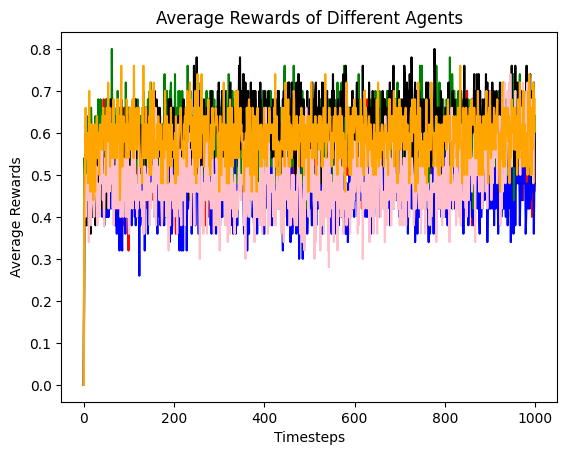

In [108]:
random.seed(2023)
np.random.seed(2023)
Rewards1=[]
for i in range(params["no_envs"]):
        
    Q_est,R,actions =PureExploitation(envs[i],params)
    Rewards1.append(R)
    
Rewards1=np.transpose(Rewards1)    
avg_rewards1=[]
for i in range(params["maxEpisodes"]):
    avg_rewards1.append(np.sum(Rewards1[i])/params["no_envs"])

plt.plot(np.arange(0,params["maxEpisodes"]),avg_rewards1, color='r')
# plt.ylabel('Average Rewards per timesteps')  
# plt.xlabel('Timesteps') 
# plt.title('PureExploitation:Average rewards recieved vs timestep 2armedBandit') 
# plt.savefig(' PureExploitation-2armedBandit Average rewards recieved vs timestep .pdf') 
# plt.close()
# print(np.shape(Rewards1))

Rewards2=[]
for i in range(params["no_envs"]):
    Q_est,R ,actions=PureExploration(envs[i],params)
    Rewards2.append(R)

Rewards2=np.transpose(Rewards2)    
    
avg_rewards2=[]
for i in range(params["maxEpisodes"]):
    avg_rewards2.append(np.sum(Rewards2[i])/params["no_envs"])

plt.plot(np.arange(0,params["maxEpisodes"]),avg_rewards2, color='blue')


Rewards3=[]
for i in range(params["no_envs"]):
    
    Q_est,R ,actions=epsilonGreedy(envs[i],params)
    Rewards3.append(R)
Rewards3=np.transpose(Rewards3)    
avg_rewards3=[]
for i in range(params["maxEpisodes"]):
    avg_rewards3.append(np.sum(Rewards3[i])/params["no_envs"])
# # print(np.shape(avg_rewards))
plt.plot(np.arange(0,params["maxEpisodes"]),avg_rewards3, color='green')

Rewards4=[]
for i in range(params["no_envs"]):
    
    Q_est,R ,actions=decayingEpsilonGreedy(envs[i],params,decay_type)
    Rewards4.append(R)
Rewards4=np.transpose(Rewards4)    
avg_rewards4=[]
for i in range(params["maxEpisodes"]):
    avg_rewards4.append(np.sum(Rewards4[i])/params["no_envs"])

plt.plot(np.arange(0,params["maxEpisodes"]),avg_rewards4, color='black')


Rewards5=[]
for i in range(params["no_envs"]):
    
    Q_est,R ,actions=softMaxExploration(envs[i],params,decay_type)
    Rewards5.append(R)
Rewards5=np.transpose(Rewards5)    
avg_rewards5=[]
for i in range(params["maxEpisodes"]):
    avg_rewards5.append(np.sum(Rewards5[i])/params["no_envs"])
plt.plot(np.arange(0,params["maxEpisodes"]),avg_rewards5,color='pink')

Rewards6=[]
for i in range(params["no_envs"]):
    
    Q_est,R,actions =UCBexploration(envs[i],params)
    Rewards6.append(R)
Rewards6=np.transpose(Rewards6)    
# print(Rewards[23])
avg_rewards6=[]
for i in range(params["maxEpisodes"]):
    avg_rewards6.append(np.sum(Rewards6[i])/params["no_envs"])
# print(np.shape(avg_rewards))

np.savez('avg_rewards_2MAB.npz', avg_rewards1=avg_rewards1, avg_rewards2=avg_rewards2, avg_rewards3=avg_rewards3, avg_rewards4=avg_rewards4, avg_rewards5=avg_rewards5, avg_rewards6=avg_rewards6)
plt.plot(np.arange(0,params["maxEpisodes"]),avg_rewards6, color='orange')
# plt.ylabel('Average Rewards per timesteps')  
# plt.xlabel('Timesteps')  
# plt.title('UCBexploration:Average rewards recieved vs timestep 2armedBandit') 
# plt.savefig(' UCBexploration-2armedBandit Average rewards recieved vs timestep .pdf') 
plt.title("Average Rewards of Different Agents")
plt.xlabel('Timesteps')
plt.ylabel("Average Rewards")
plt.savefig("Average Rewards of Different Agents-2 armed bandit.pdf")
# plt.close()   

Average Regret for different Agents

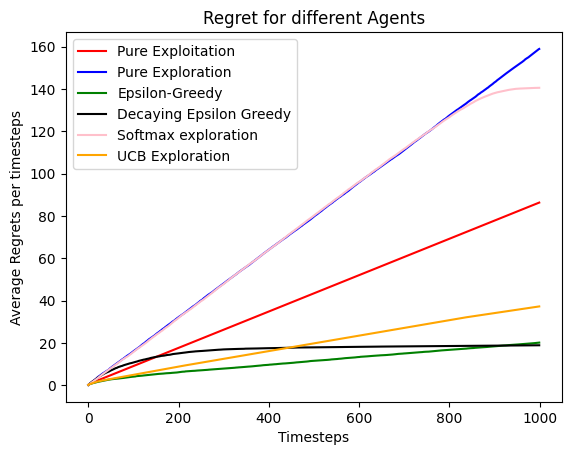

In [110]:
random.seed(2023)
np.random.seed(2023)
Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.empty((params["no_envs"],envs[0].action_space.n))
Regret1=np.zeros(params["maxEpisodes"])
for i in range(params["no_envs"]):
    
    Q_est,R,actions=PureExploitation(envs[i],params)
    Actions1[i]=actions

Actions1=np.transpose(Actions1)
for i in range(params["maxEpisodes"]):
    if i==0:
        sum = 0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])
        Regret1[i]=sum/params["no_envs"]
    else:
        sum =0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])
        Regret1[i]=Regret1[i-1]+(sum/params["no_envs"])

plt.plot(np.arange(0,params["maxEpisodes"]),Regret1, color='r')


Actions2=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est2=np.empty((params["no_envs"],envs[0].action_space.n))
Regret2=np.zeros(params["maxEpisodes"])
for i in range(params["no_envs"]):
    
    Q_est,R,actions=PureExploration(envs[i],params)
    Actions2[i]=actions

Actions2=np.transpose(Actions2)
for i in range(params["maxEpisodes"]):
    if i==0:
        sum = 0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions2[i][j])])

        Regret2[i]=sum/params["no_envs"]
    else:
        sum =0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions2[i][j])])
        Regret2[i]=Regret2[i-1]+(sum/params["no_envs"])
# print(Regret1)
plt.plot(np.arange(0,params["maxEpisodes"]),Regret2, color='blue')

Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.empty((params["no_envs"],envs[0].action_space.n))
Regret1=np.zeros(params["maxEpisodes"])
for i in range(params["no_envs"]):
    
    Q_est,R,actions=epsilonGreedy(envs[i],params)
    # print(actions)
    # print(np.shape(actions))
    Actions1[i]=actions

Actions1=np.transpose(Actions1)
for i in range(params["maxEpisodes"]):
    if i==0:
        sum = 0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])
        # print(np.shape(sum))
        Regret1[i]=sum/params["no_envs"]
    else:
        sum =0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])
        Regret1[i]=Regret1[i-1]+sum/params["no_envs"]
# print(Regret1)
plt.plot(np.arange(0,params["maxEpisodes"]),Regret1, color='green')


Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.empty((params["no_envs"],envs[0].action_space.n))
Regret1=np.zeros(params["maxEpisodes"])
for i in range(params["no_envs"]):
        
    Q_est,R,actions=decayingEpsilonGreedy(envs[i],params,decay_type)
    # print(np.shape(actions))
    Actions1[i]=actions
Actions1=np.transpose(Actions1)
for i in range(params["maxEpisodes"]):
    if i==0:
        sum = 0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])
        Regret1[i]=sum/params["no_envs"]
    else:
        sum =0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])
        Regret1[i]=Regret1[i-1]+sum/params["no_envs"]
plt.plot(np.arange(0,params["maxEpisodes"]),Regret1, color='black')


Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.empty((params["no_envs"],envs[0].action_space.n))
Regret1=np.zeros(params["maxEpisodes"])
for i in range(params["no_envs"]):

    Q_est,R,actions=softMaxExploration(envs[i],params,decay_type)
    Actions1[i]=actions

Actions1=np.transpose(Actions1)
for i in range(params["maxEpisodes"]):
    if i==0:
        sum = 0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])
            # print(sum)
        Regret1[i]=sum/params["no_envs"]
    else:
        sum =0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])
        Regret1[i]=Regret1[i-1]+sum/params["no_envs"]
plt.plot(np.arange(0,params["maxEpisodes"]),Regret1, color='pink')


Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.empty((params["no_envs"],envs[0].action_space.n))
Regret1=np.zeros(params["maxEpisodes"])
for i in range(params["no_envs"]):
    
    Q_est,R,actions=UCBexploration(envs[i],params)

    Actions1[i]=actions

Actions1=np.transpose(Actions1)
for i in range(params["maxEpisodes"]):
    if i==0:
        sum = 0
        for j in range(params["no_envs"]):
            sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])

        Regret1[i]=sum/params["no_envs"]
    else:
        sum =0
        for j in range(params["no_envs"]):
                sum+=(v_star[j]-q_star[j][int(Actions1[i][j])])
        Regret1[i]=Regret1[i-1]+sum/params["no_envs"]

plt.plot(np.arange(0,params["maxEpisodes"]),Regret1, color='orange')
plt.ylabel('Average Regrets per timesteps')  
plt.xlabel('Timesteps') 
# plt.title('UCBexploration:Average regrets recieved vs timestep 2armedBandit') 
plt.legend(["Pure Exploitation","Pure Exploration","Epsilon-Greedy","Decaying Epsilon Greedy","Softmax exploration","UCB Exploration"], loc ="upper left")
plt.title("Regret for different Agents")
plt.savefig('Regrets 2 armed.pdf') 



% of Optimal Actions taken by different Agents

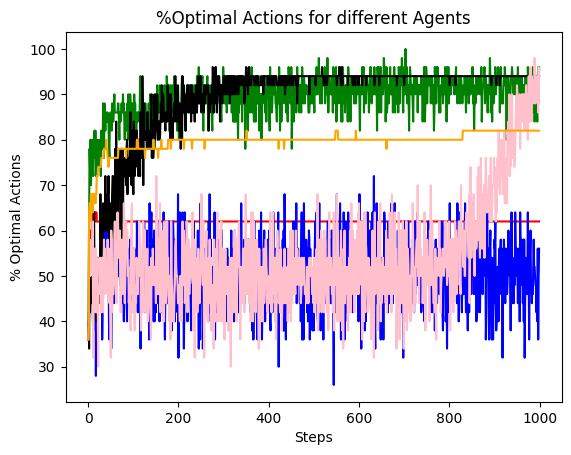

In [111]:
random.seed(2023)
np.random.seed(2023)
Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.zeros((params["no_envs"],envs[0].action_space.n))
for i in range(params["no_envs"]):
    Q_est,R,actions=PureExploitation(envs[i],params)
    # print(actions)
    # print(np.shape(actions))
    Actions1[i]=actions
    # print(Q_est[-1])
    # Q_est1[i]=Q_est[-1]
Actions1=np.transpose(Actions1)
# print(np.shape(Actions1))
optimal1=np.zeros((params["maxEpisodes"]))     
for i in range(params["maxEpisodes"]):
    count1=0
    for j in range(params["no_envs"]):
        if Actions1[i][j] in np.where(q_star[j]==v_star[j]):
            count1+=1
    optimal1[i]=(count1*100/params["no_envs"])
plt.plot(np.arange(0,params["maxEpisodes"]),optimal1, color='r')
# plt.ylabel('Average Regrets per timesteps')  
# plt.xlabel('Timesteps') 
# plt.title('PureExploitation: % optimal action done vs timestep 2armedBandit') 
# plt.savefig(' PureExploitation-2armedBandit  % optimal action done  vs timestep .pdf') 
# plt.close()

Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.zeros((params["no_envs"],envs[0].action_space.n))
for i in range(params["no_envs"]):
    Q_est,R,actions=PureExploration(envs[i],params)
    # print(actions)
    # print(np.shape(actions))
    Actions1[i]=actions
    # print(Q_est[-1])
    # Q_est1[i]=Q_est[-1]
Actions1=np.transpose(Actions1)
# print(np.shape(Actions1))
optimal1=np.zeros((params["maxEpisodes"]))     
for i in range(params["maxEpisodes"]):
    count1=0
    for j in range(params["no_envs"]):
        if Actions1[i][j] in np.where(q_star[j]==v_star[j]):
            count1+=1
    optimal1[i]=(count1*100/params["no_envs"])
plt.plot(np.arange(0,params["maxEpisodes"]),optimal1, color='blue')


Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.zeros((params["no_envs"],envs[0].action_space.n))
for i in range(params["no_envs"]):
    Q_est,R,actions=epsilonGreedy(envs[i],params)
    # print(actions)
    # print(np.shape(actions))
    Actions1[i]=actions
    # print(Q_est[-1])
    # Q_est1[i]=Q_est[-1]
Actions1=np.transpose(Actions1)
# print(np.shape(Actions1))
optimal1=np.zeros((params["maxEpisodes"]))     
for i in range(params["maxEpisodes"]):
    count1=0
    for j in range(params["no_envs"]):
        if Actions1[i][j] in np.where(q_star[j]==v_star[j]):
            count1+=1
    optimal1[i]=(count1*100/params["no_envs"])
plt.plot(np.arange(0,params["maxEpisodes"]),optimal1, color='green')

Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.zeros((params["no_envs"],envs[0].action_space.n))
for i in range(params["no_envs"]):
    Q_est,R,actions=decayingEpsilonGreedy(envs[i],params,decay_type)
    # print(actions)
    # print(np.shape(actions))
    Actions1[i]=actions
    # print(Q_est[-1])
    # Q_est1[i]=Q_est[-1]
Actions1=np.transpose(Actions1)
# print(np.shape(Actions1))
optimal1=np.zeros((params["maxEpisodes"]))     
for i in range(params["maxEpisodes"]):
    count1=0
    for j in range(params["no_envs"]):
        if Actions1[i][j] in np.where(q_star[j]==v_star[j]):
            count1+=1
    optimal1[i]=(count1*100/params["no_envs"])
plt.plot(np.arange(0,params["maxEpisodes"]),optimal1, color='black')

Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.zeros((params["no_envs"],envs[0].action_space.n))
for i in range(params["no_envs"]):
    Q_est,R,actions=softMaxExploration(envs[i],params,decay_type)
    # print(actions)
    # print(np.shape(actions))
    Actions1[i]=actions
    # print(Q_est[-1])
    # Q_est1[i]=Q_est[-1]
Actions1=np.transpose(Actions1)
# print(np.shape(Actions1))
optimal1=np.zeros((params["maxEpisodes"]))     
for i in range(params["maxEpisodes"]):
    count1=0
    for j in range(params["no_envs"]):
        if Actions1[i][j] in np.where(q_star[j]==v_star[j]):
            count1+=1
    optimal1[i]=(count1*100/params["no_envs"])
plt.plot(np.arange(0,params["maxEpisodes"]),optimal1, color='pink')

Actions1=np.zeros((params["no_envs"],params["maxEpisodes"]))
Q_est1=np.zeros((params["no_envs"],envs[0].action_space.n))
for i in range(params["no_envs"]):
    Q_est,R,actions=UCBexploration(envs[i],params)
    # print(actions)
    # print(np.shape(actions))
    Actions1[i]=actions
    # print(Q_est[-1])
    # Q_est1[i]=Q_est[-1]
Actions1=np.transpose(Actions1)
# print(np.shape(Actions1))
optimal1=np.zeros((params["maxEpisodes"]))     
for i in range(params["maxEpisodes"]):
    count1=0
    for j in range(params["no_envs"]):
        if Actions1[i][j] in np.where(q_star[j]==v_star[j]):
            count1+=1
    optimal1[i]=(count1*100/params["no_envs"])
plt.plot(np.arange(0,params["maxEpisodes"]),optimal1, color='orange')
# plt.ylabel('Average Regrets per timesteps')  
# plt.xlabel('Timesteps') 
# plt.title('UCBexploration: % optimal action done vs timestep 2armedBandit') 
# plt.savefig(' UCBexploration-2armedBandit  % optimal action done  vs timestep .pdf') 
# plt.close()
plt.ylabel("% Optimal Actions")
plt.xlabel("Steps") 
# plt.legend(["Pure Exploitation","Pure Exploration","Epsilon-Greedy","Decaying Epsilon Greedy","Softmax exploration","UCB Exploration"], loc ="upper left")
plt.title("%Optimal Actions for different Agents")
plt.savefig('%Optimal Actions- 2 armed.pdf') 
